In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
import time

In [2]:
dataLED = psu.read_fileLED('/data/abalone/2021_05_05/SiPM2_32V_ABALONE_12k_LED_10V.dat')

/data/abalone/2021_05_05/SiPM2_32V_ABALONE_12k_LED_10V.dat Number of events 59356.0


In [3]:
datanoLED = psu.read_filenoLED('/data/abalone/2021_05_05/SiPM2_32V_ABALONE_12k_NoLED.dat')

/data/abalone/2021_05_05/SiPM2_32V_ABALONE_12k_NoLED.dat Number of events 444326.0


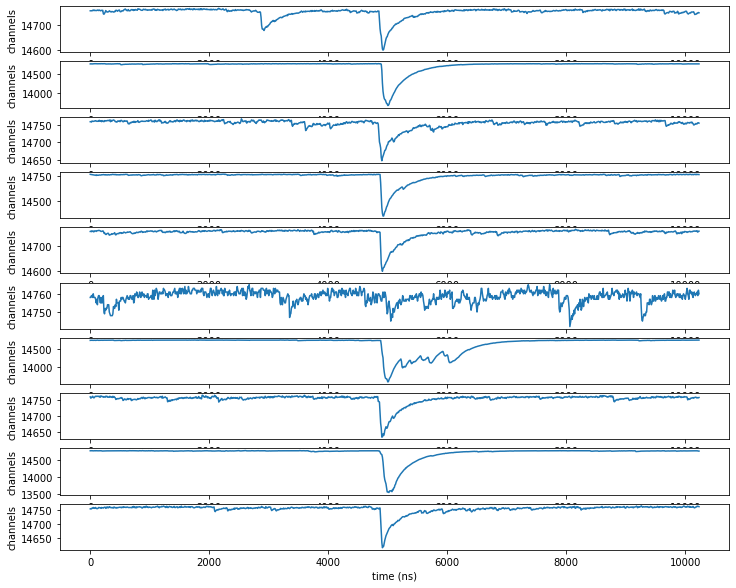

In [4]:
psu.plot_waveformsnoLED (datanoLED, events = 10)

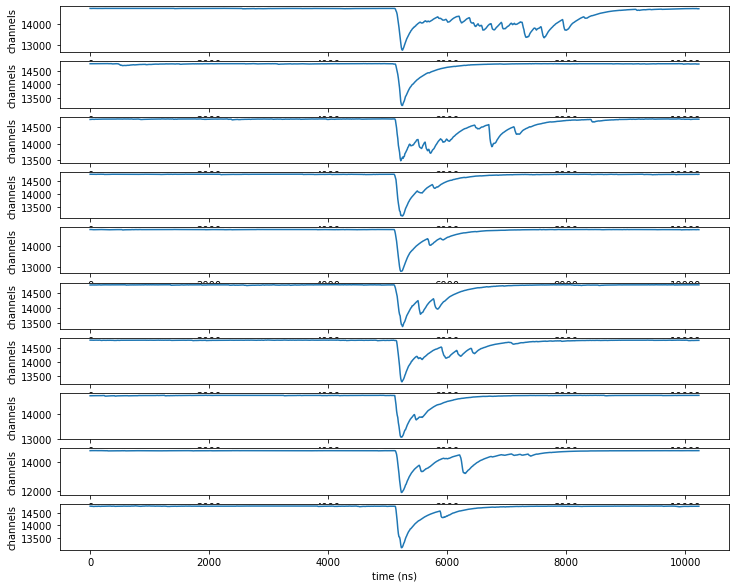

In [5]:
psu.plot_waveformsLED (dataLED, events = 10)

In [6]:
wmin=[]
for i in range(len(datanoLED)): 
    a = datanoLED[i].min()
    wmin.append(a)

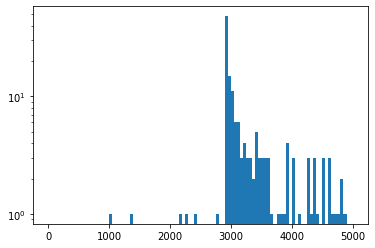

In [7]:
h=plt.hist(wmin, range=(1,5000), bins=100 )
plt.yscale("log")

In [8]:
datacut=datanoLED[np.array(wmin)<5000]

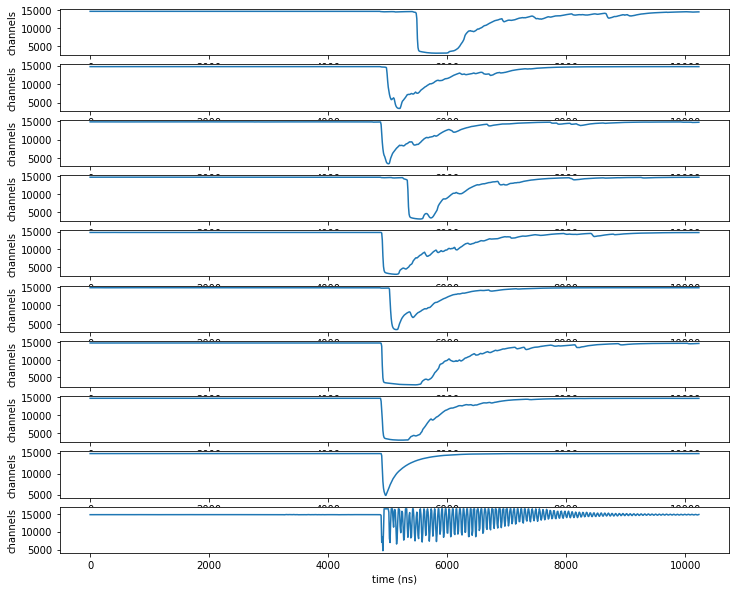

In [9]:
psu.plot_waveformsnoLED (datacut, events = 10)

In [10]:
wmax=[]
for i in range(len(datanoLED)): 
    a = datanoLED[i].max()
    wmax.append(a)

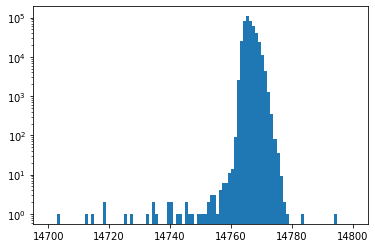

In [11]:
h=plt.hist(wmax, range=(14700,14800), bins=100 )
plt.yscale("log")

In [12]:
datacut2=datanoLED[np.array(wmax)>14770]
print(len(datacut2))

6085


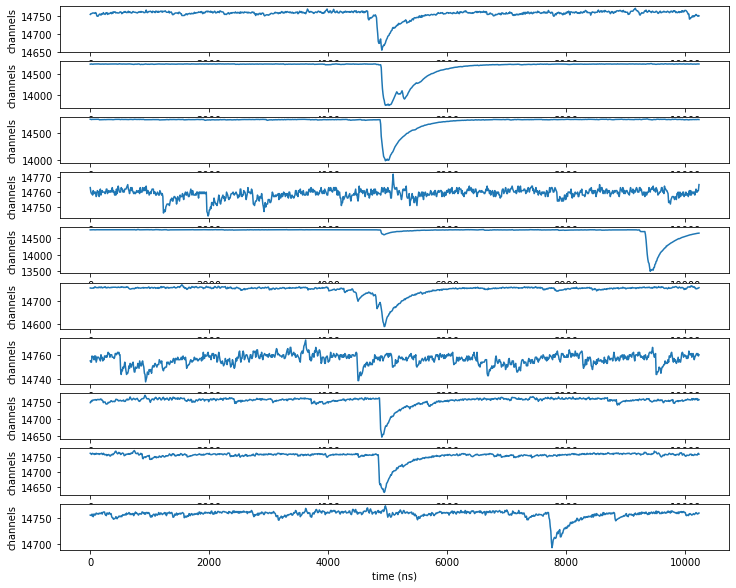

In [13]:
psu.plot_waveformsnoLED (datacut2, events = 10)

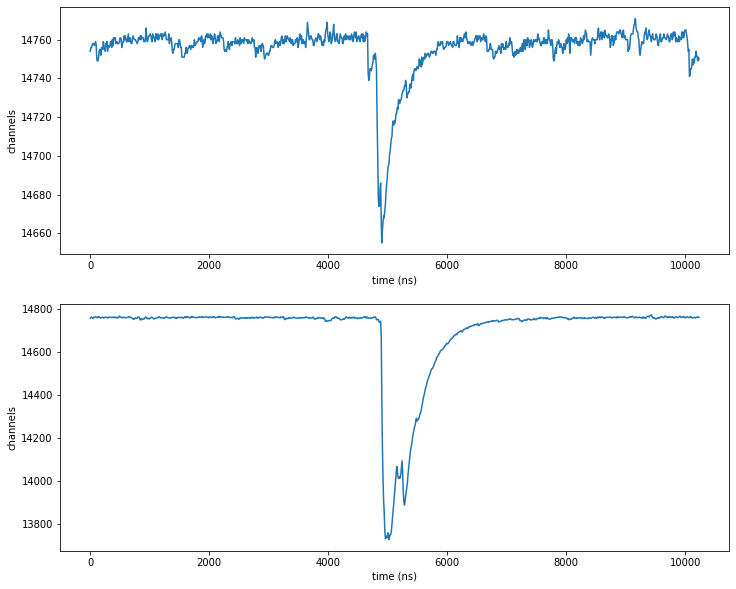

In [15]:
psu.plot_waveformsnoLED (datacut2, events = 2)

In [11]:
def process_abalone_data(datanoLED,nn=1000,nplot=5):
    print(f'Total events number: {len(datanoLED)}')
    MINs, FOMs, MAXs, INTs, width50 = [], [], [], [], []
    ts = time.time()
    plt.figure(figsize=(12,6))
    if nn == 0: nn = len(datanoLED)
    for i in range(nn):
        if (i % 10000) == 0: print(f'event n. {i} time to process: {time.time()-ts:.2f}')
        bl=np.max(datanoLED[i][:])
        wf = bl-datanoLED[i]
        max_pos = np.where(wf==np.max(wf))[0][0]
        area = np.sum(wf)
        fom = np.sum(wf[max_pos:])/area
        ii, areafrac = 1, 0
        while areafrac < 0.5:
            ilo50, ihi50 = max_pos-ii, max_pos+ii
            areafrac = np.sum(wf[ilo50:ihi50])/area
            ii += 1
            wid50 = ihi50 - ilo50
        MINs.append(bl)
        MAXs.append(np.max(wf))
        FOMs.append(fom)
        INTs.append(area)
        width50.append(wid50)
        if i < nplot: plt.plot(wf,label=f'A={area}, W={wid50}, f.o.m.={fom:.2f}')
    plt.legend()
    return MINs, FOMs, MAXs, INTs, width50

Total events number: 444326
event n. 0 time to process: 0.00
event n. 10000 time to process: 6.18
event n. 20000 time to process: 12.23
event n. 30000 time to process: 18.34
event n. 40000 time to process: 24.52
event n. 50000 time to process: 30.57
event n. 60000 time to process: 36.62
event n. 70000 time to process: 42.66
event n. 80000 time to process: 48.63
event n. 90000 time to process: 54.63
event n. 100000 time to process: 60.67
event n. 110000 time to process: 66.85
event n. 120000 time to process: 72.96
event n. 130000 time to process: 78.94
event n. 140000 time to process: 85.14
event n. 150000 time to process: 91.20
event n. 160000 time to process: 97.22
event n. 170000 time to process: 103.34
event n. 180000 time to process: 109.41
event n. 190000 time to process: 115.43
event n. 200000 time to process: 121.56
event n. 210000 time to process: 127.65
event n. 220000 time to process: 133.58
event n. 230000 time to process: 139.67
event n. 240000 time to process: 145.67
event

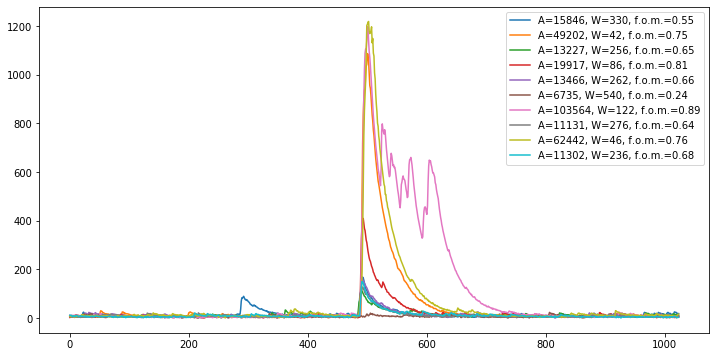

In [12]:
MINs, FOMs, MAXs, INTs, width50 = process_abalone_data(datanoLED,nn=0,nplot=10)

Text(0, 1, 'counts')

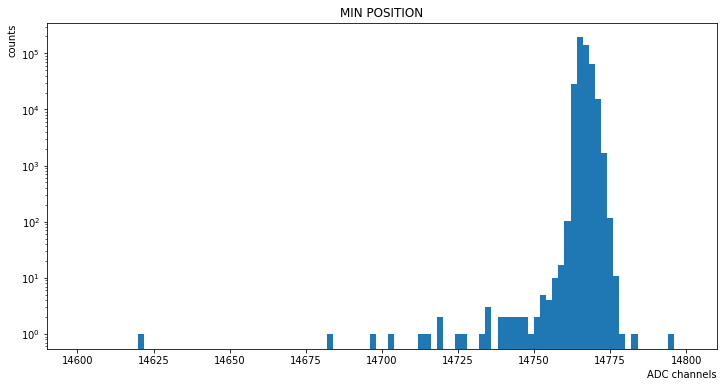

In [14]:
plt.figure(figsize=(12,6))
a=plt.hist(MINs,range=(14600,14800),bins=100)
plt.yscale('log')
plt.title('MIN POSITION')
plt.xlabel('ADC channels', ha='right',x=1)
plt.ylabel('counts', ha='right',y=1)

Text(0, 1, 'counts')

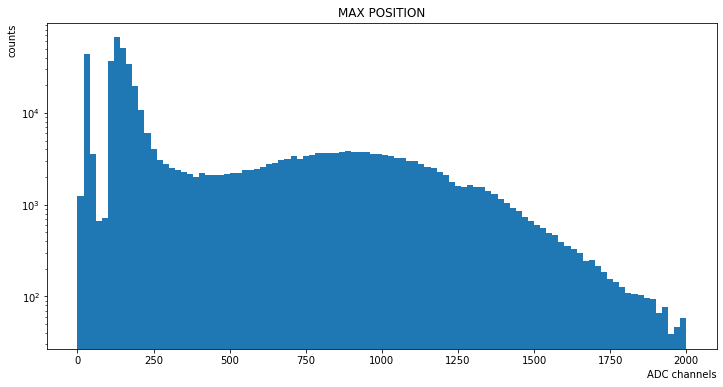

In [15]:
plt.figure(figsize=(12,6))
a=plt.hist(MAXs,range=(0,2000),bins=100)
plt.yscale('log')
plt.title('MAX POSITION')
plt.xlabel('ADC channels',ha='right',x=1)
plt.ylabel('counts',ha='right',y=1)

Text(0, 1, 'counts')

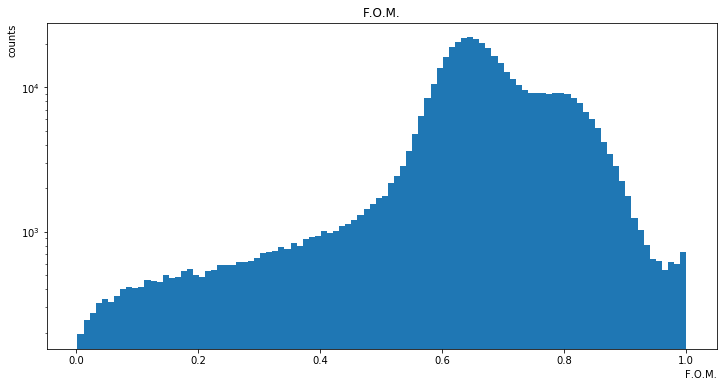

In [16]:
plt.figure(figsize=(12,6))
a=plt.hist(FOMs,bins=100)
plt.yscale('log')
plt.title('F.O.M.')
plt.xlabel('F.O.M.',ha='right',x=1)
plt.ylabel('counts',ha='right',y=1)

Text(0, 1, 'counts')

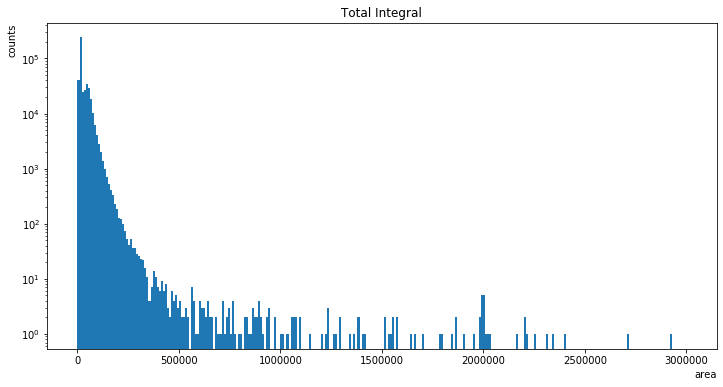

In [17]:
plt.figure(figsize=(12,6))
a=plt.hist(INTs,bins=300,range=(0,3e6))
plt.yscale('log')
plt.title('Total Integral')
plt.xlabel('area',ha='right',x=1)
plt.ylabel('counts',ha='right',y=1)

Text(0, 1, 'counts')

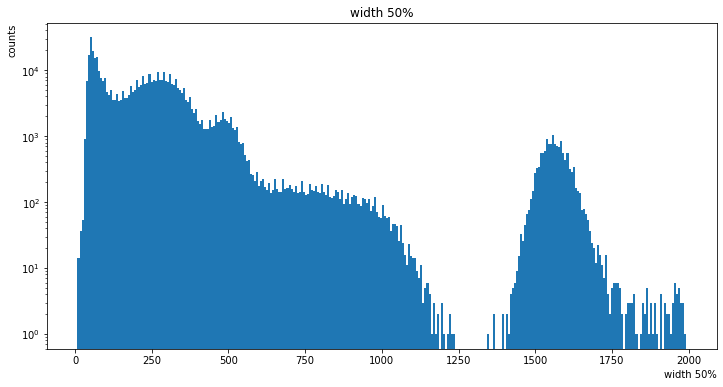

In [18]:
plt.figure(figsize=(12,6))
a=plt.hist(width50,bins=300)
plt.yscale('log')
plt.title('width 50%')
plt.xlabel('width 50%',ha='right',x=1)
plt.ylabel('counts',ha='right',y=1)

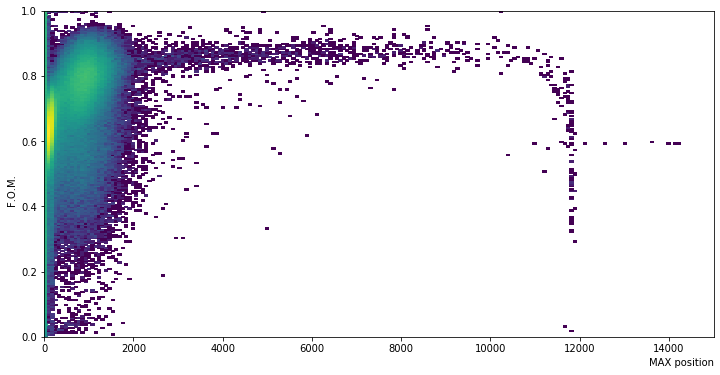

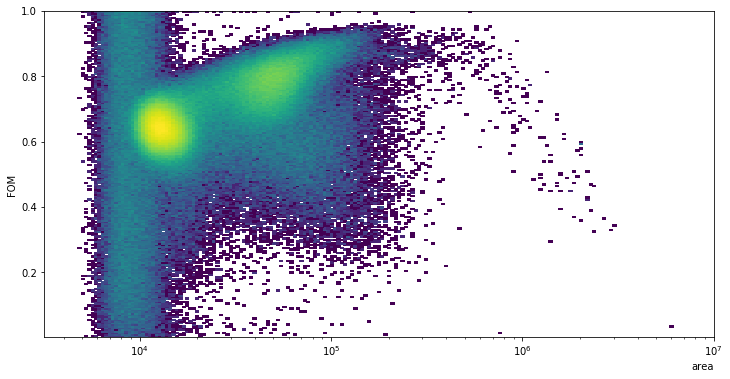

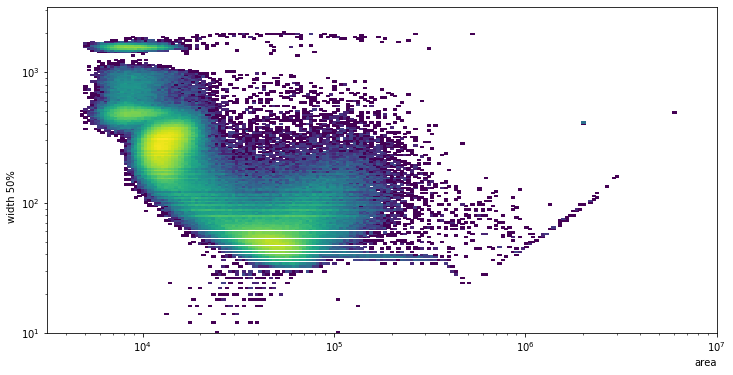

In [61]:
def plot_hist2D(MAXs,FOMs,INTs,width50):
    plt.figure(figsize=(12,6))
    a=plt.hist2d(MAXs,FOMs,range=((0,15000),(0,1)),bins=200,norm=matplotlib.colors.LogNorm())
    plt.xlabel('MAX position',ha='right',x=1)
    plt.ylabel('F.O.M.',ha='right',x=1)
    
    plt.figure(figsize=(12,6))
    a=plt.hist2d(INTs,FOMs,bins=(np.logspace(3.5,7, 200),200),norm=matplotlib.colors.LogNorm())
    plt.xscale('log')
    plt.xlabel('area',ha='right',x=1)
    plt.ylabel('FOM',ha='right',x=1)
    
    plt.figure(figsize=(12,6))
    a=plt.hist2d(INTs,width50,bins=(np.logspace(3.5,7, 200),np.logspace(1,3.5, 200)),norm=matplotlib.colors.LogNorm())
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('area',ha='right',x=1)
    plt.ylabel('width 50%',ha='right',x=1)
plot_hist2D(MAXs,FOMs,INTs,width50)

10500


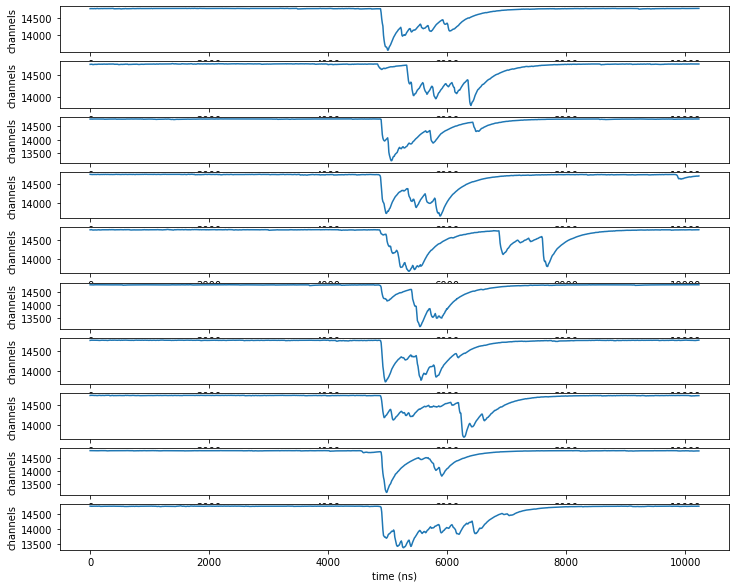

In [55]:
#maxs = np.array(MAXs)
#width = np.array(width50)
area = np.array(INTs)
datacut3 = datanoLED[(area<10e5)&(area>10e4)]
print(len(datacut3))
psu.plot_waveformsnoLED( datacut3, events = 10)

72


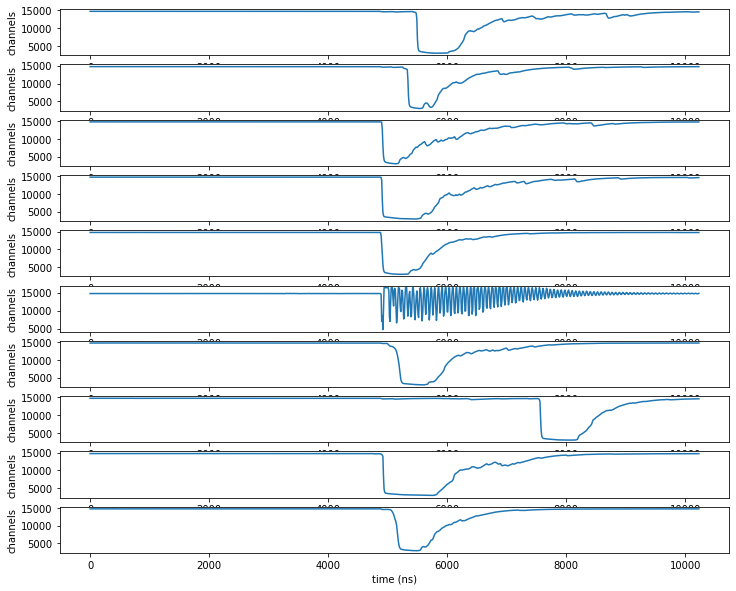

In [56]:
#width = np.array(width50)
area = np.array(INTs)
#maxs = np.array(MAXs)
datacut3 = datanoLED[(area<10e6)&(area>10e5)]
print(len(datacut3))
psu.plot_waveformsnoLED( datacut3, events = 10)

433754


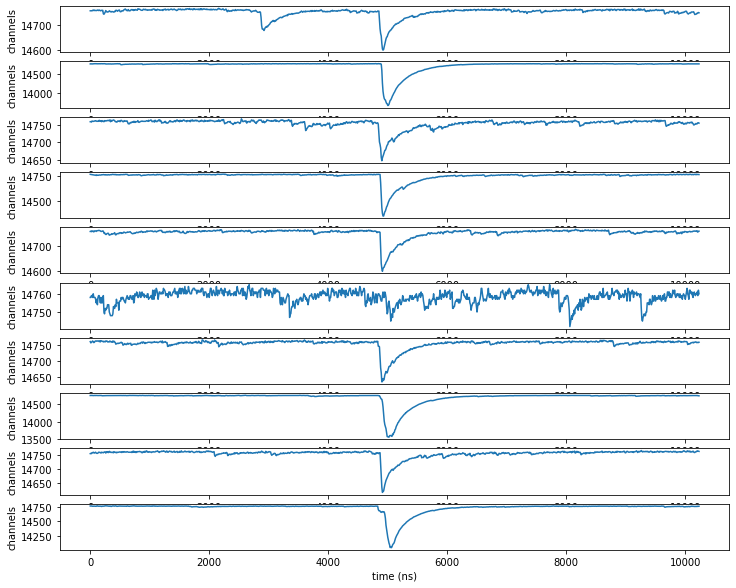

In [57]:
#width = np.array(width50)
area = np.array(INTs)
#maxs = np.array(MAXs)
datacut3 = datanoLED[(area<10e4)]
print(len(datacut3))
psu.plot_waveformsnoLED( datacut3, events = 10)

8940


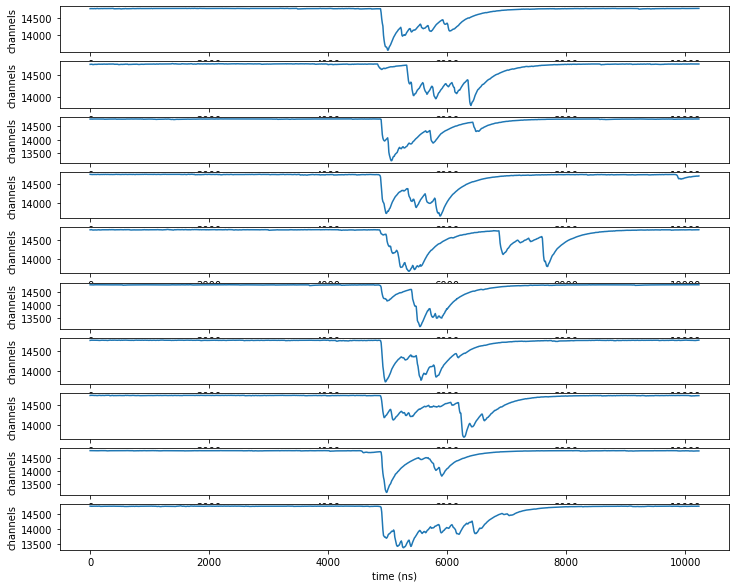

In [63]:
width = np.array(width50)
area = np.array(INTs)
maxs = np.array(MAXs)
datacut3 = datanoLED[(area<10e5)&(area>10e4)&(width<10e5)&(maxs<2000)]
print(len(datacut3))
psu.plot_waveformsnoLED( datacut3, events = 10)

## DATI LED

In [64]:
def process_abalone_data(dataLED,nn=1000,nplot=5):
    print(f'Total events number: {len(dataLED)}')
    MINs, FOMs, MAXs, INTs, width50 = [], [], [], [], []
    ts = time.time()
    plt.figure(figsize=(12,6))
    if nn == 0: nn = len(dataLED)
    for i in range(nn):
        if (i % 10000) == 0: print(f'event n. {i} time to process: {time.time()-ts:.2f}')
        bl=np.max(dataLED[i][:])
        wf = bl-dataLED[i]
        max_pos = np.where(wf==np.max(wf))[0][0]
        area = np.sum(wf)
        fom = np.sum(wf[max_pos:])/area
        ii, areafrac = 1, 0
        while areafrac < 0.5:
            ilo50, ihi50 = max_pos-ii, max_pos+ii
            areafrac = np.sum(wf[ilo50:ihi50])/area
            ii += 1
            wid50 = ihi50 - ilo50
        MINs.append(bl)
        MAXs.append(np.max(wf))
        FOMs.append(fom)
        INTs.append(area)
        width50.append(wid50)
        if i < nplot: plt.plot(wf,label=f'A={area}, W={wid50}, f.o.m.={fom:.2f}')
    plt.legend()
    return MINs, FOMs, MAXs, INTs, width50

Total events number: 59356
event n. 0 time to process: 0.00
event n. 10000 time to process: 1.68
event n. 20000 time to process: 3.15
event n. 30000 time to process: 4.47
event n. 40000 time to process: 5.80
event n. 50000 time to process: 7.15


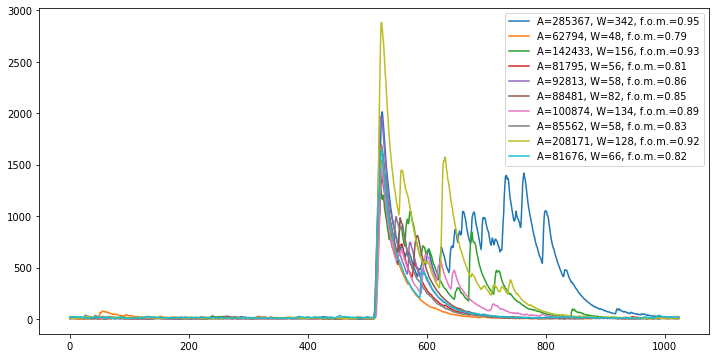

In [65]:
MINs, FOMs, MAXs, INTs, width50 = process_abalone_data(dataLED,nn=0,nplot=10)

Text(0, 1, 'counts')

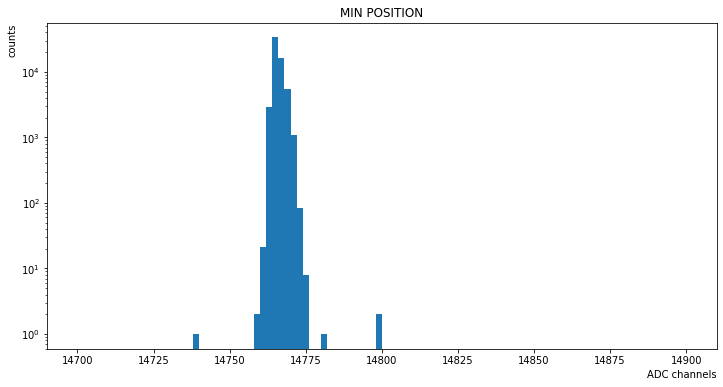

In [68]:
plt.figure(figsize=(12,6))
a=plt.hist(MINs,range=(14700,14900),bins=100)
plt.yscale('log')
plt.title('MIN POSITION')
plt.xlabel('ADC channels', ha='right',x=1)
plt.ylabel('counts', ha='right',y=1)

Text(0, 1, 'counts')

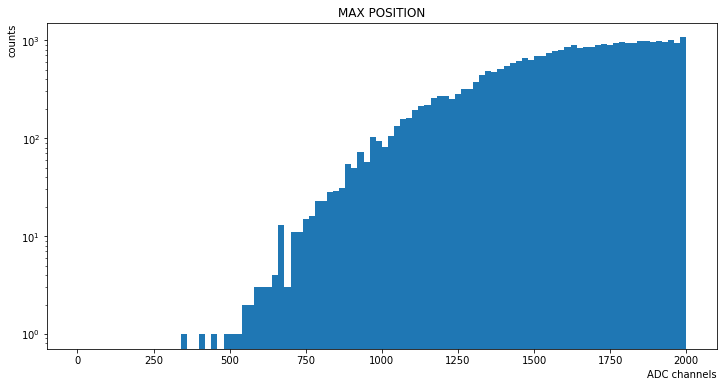

In [69]:
plt.figure(figsize=(12,6))
a=plt.hist(MAXs,range=(0,2000),bins=100)
plt.yscale('log')
plt.title('MAX POSITION')
plt.xlabel('ADC channels',ha='right',x=1)
plt.ylabel('counts',ha='right',y=1)

Text(0, 1, 'counts')

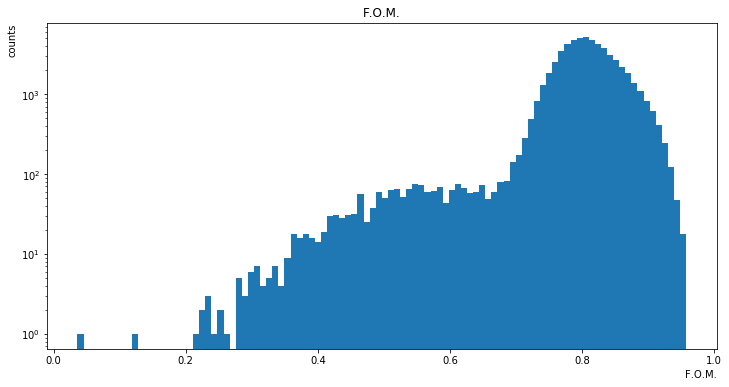

In [70]:
plt.figure(figsize=(12,6))
a=plt.hist(FOMs,bins=100)
plt.yscale('log')
plt.title('F.O.M.')
plt.xlabel('F.O.M.',ha='right',x=1)
plt.ylabel('counts',ha='right',y=1)

Text(0, 1, 'counts')

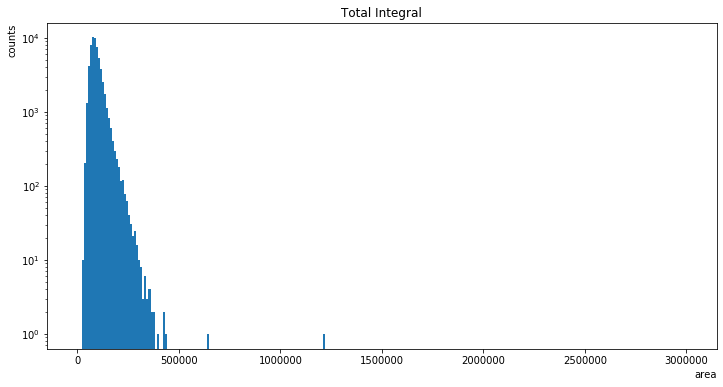

In [71]:
plt.figure(figsize=(12,6))
a=plt.hist(INTs,bins=300,range=(0,3e6))
plt.yscale('log')
plt.title('Total Integral')
plt.xlabel('area',ha='right',x=1)
plt.ylabel('counts',ha='right',y=1)

Text(0, 1, 'counts')

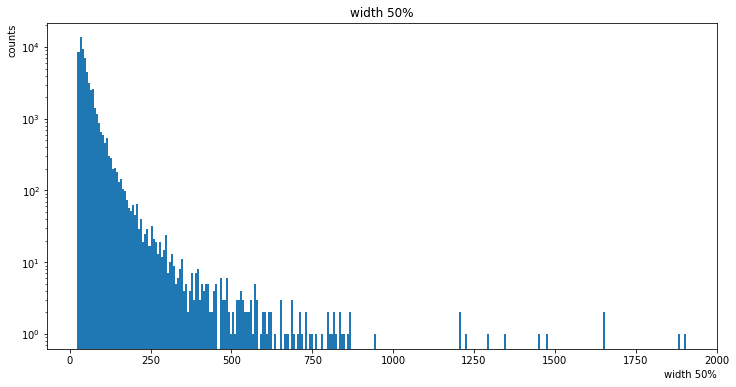

In [72]:
plt.figure(figsize=(12,6))
a=plt.hist(width50,bins=300)
plt.yscale('log')
plt.title('width 50%')
plt.xlabel('width 50%',ha='right',x=1)
plt.ylabel('counts',ha='right',y=1)

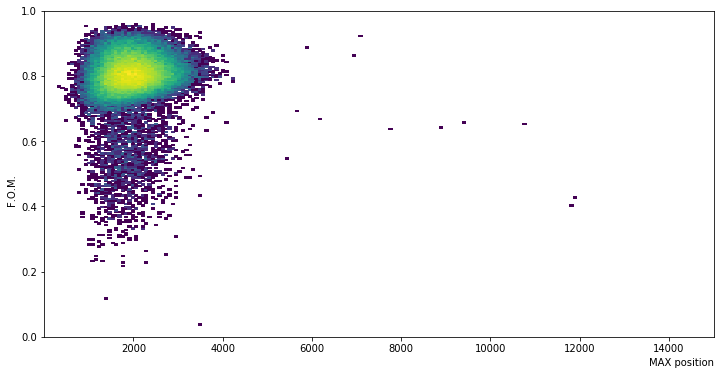

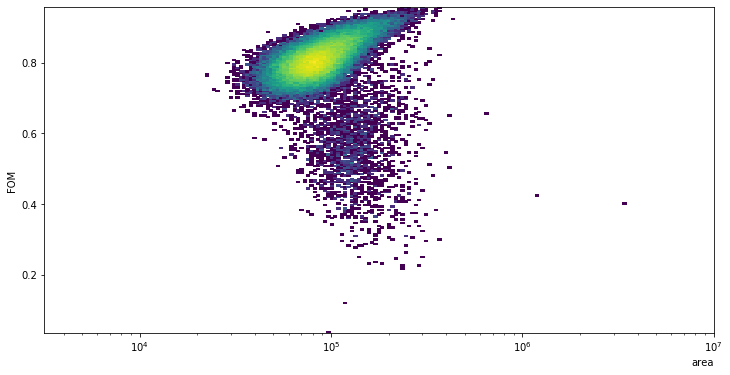

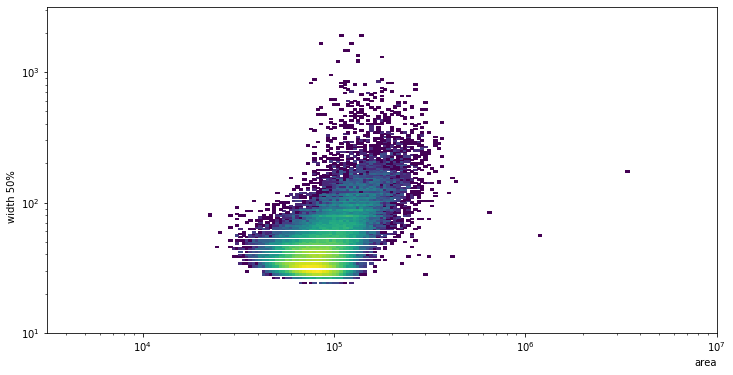

In [73]:
def plot_hist2D(MAXs,FOMs,INTs,width50):
    plt.figure(figsize=(12,6))
    a=plt.hist2d(MAXs,FOMs,range=((1,15000),(0,1)),bins=200,norm=matplotlib.colors.LogNorm())
    plt.xlabel('MAX position',ha='right',x=1)
    plt.ylabel('F.O.M.',ha='right',x=1)
    
    plt.figure(figsize=(12,6))
    a=plt.hist2d(INTs,FOMs,bins=(np.logspace(3.5,7, 200),200),norm=matplotlib.colors.LogNorm())
    plt.xscale('log')
    plt.xlabel('area',ha='right',x=1)
    plt.ylabel('FOM',ha='right',x=1)
    
    plt.figure(figsize=(12,6))
    a=plt.hist2d(INTs,width50,bins=(np.logspace(3.5,7, 200),np.logspace(1,3.5, 200)),norm=matplotlib.colors.LogNorm())
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('area',ha='right',x=1)
    plt.ylabel('width 50%',ha='right',x=1)
plot_hist2D(MAXs,FOMs,INTs,width50)

5


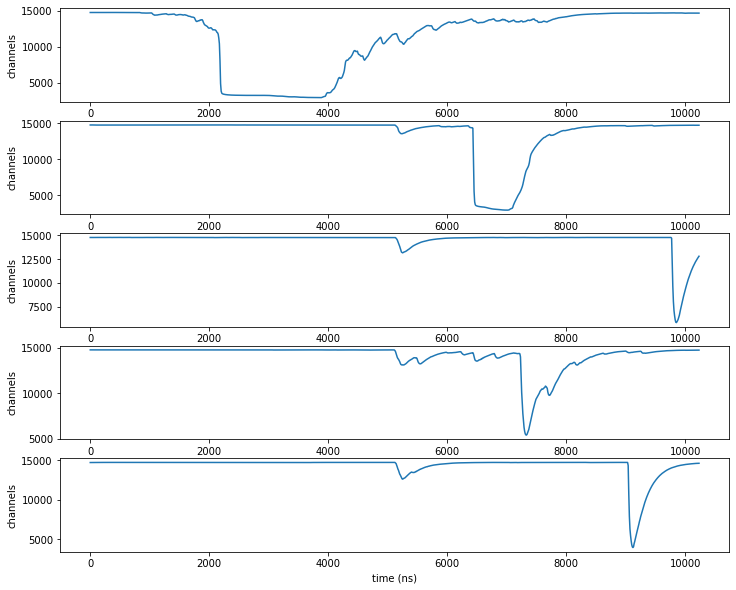

In [83]:
maxs = np.array(MAXs)
width = np.array(width50)
area = np.array(INTs)
datacut4 = dataLED[(maxs>8000)&(maxs<12000)]
print(len(datacut4))
psu.plot_waveformsLED( datacut4, events = 5)